# `02-regression.ipynb`

# Regression (회귀)

## K-Nearest Neighbors Regressor

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')

In [2]:
perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

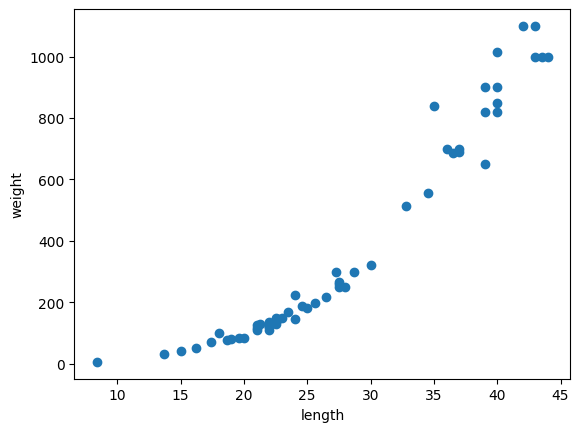

In [3]:
plt.scatter(perch_length, perch_weight)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(perch_length, perch_weight, random_state=42)
# Vector -> Matrix
X_train = X_train.reshape(-1, 1)
X_test = X_test.reshape(-1, 1)

In [6]:
from sklearn.neighbors import KNeighborsRegressor

knr = KNeighborsRegressor()
knr.fit(X_train, y_train)
knr.score(X_test, y_test)

0.992809406101064

In [ ]:
from sklearn.metrics import mean_absolute_error
test_prediction = knr.predict(X_test)
#                       예측 무게,  실제 무게
mean_absolute_error(test_prediction, y_test)

(array([  60. ,   79.6,  248. ,  122. ,  136. ,  847. ,  311.4,  183.4,
         847. ,  113. , 1010. ,   60. ,  248. ,  248. ]),
 array([   5.9,  100. ,  250. ,  130. ,  130. ,  820. ,  320. ,  188. ,
         900. ,  125. , 1000. ,   51.5,  250. ,  300. ]))

In [9]:
knr.score(X_train, y_train)

0.9698823289099254

- 과대 적함 (Overfitting)
    - 훈련 세트 점수 >> 테스트 세트 점수
- 과소 적합 (Underfitting)
    - 훈련 세트 점수 << 테스트 세트 점수
    - 그냥 점수가 낮음

In [14]:
# 과소 적합
knr.n_neighbors = 5
print(knr.score(X_train, y_train) - knr.score(X_test, y_test))

knr.n_neighbors = 3
print(knr.score(X_train, y_train) - knr.score(X_test, y_test))

-0.022927077191138623
0.005843998653135674


[1033.33333333]


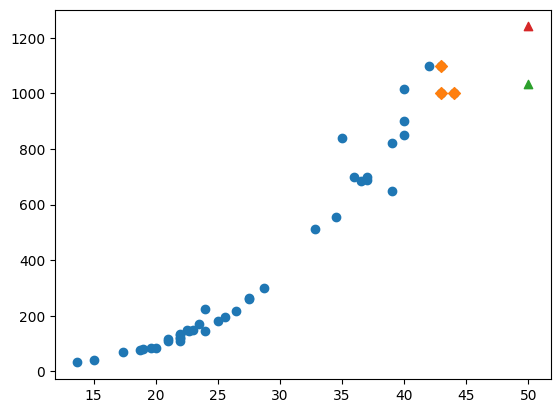

In [26]:
print(knr.predict([[50]]))
distances, indexes = knr.kneighbors([[50]])

plt.scatter(X_train, y_train)
plt.scatter(X_train[indexes], y_train[indexes], marker='D')
plt.scatter(50, 1033, marker='^')
plt.scatter(50, 1241, marker='^')
plt.show()

### 선형 회귀 (Linear Regression)

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

lr.fit(X_train, y_train)
# 기울기, 절편
print(lr.coef_, lr.intercept_)
# 점수 -> train > test. 하지만 둘 다 낮아서 과소적합
print(lr.score(X_train, y_train))
print(lr.score(X_test, y_test))
# 길이 50의 무게 예측
lr.predict([[50]])

[39.01714496] -709.0186449535474
0.9398463339976041
0.824750312331356


array([1241.83860323])

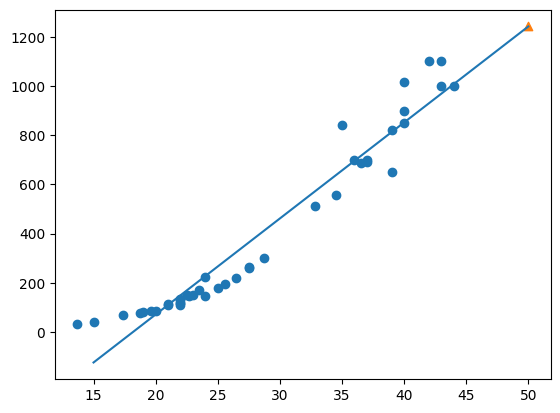

In [32]:
plt.scatter(X_train, y_train)
plt.plot([15, 50], [15*lr.coef_ + lr.intercept_, 50*lr.coef_ + lr.intercept_])
plt.scatter(50, 1241.8, marker='^')

### 다항 회귀 (Polynomial Regression)

In [38]:
X_train_poly = np.column_stack((X_train ** 2, X_train))
X_test_poly = np.column_stack((X_test ** 2, X_test))

In [46]:
lr = LinearRegression()
lr.fit(X_train_poly, y_train)

print(lr.coef_, lr.intercept_)

print(lr.score(X_train_poly, y_train))
print(lr.score(X_test_poly, y_test))

lr.predict([[50**2, 50]])

[  1.01433211 -21.55792498] 116.0502107827827
0.9706807451768623
0.9775935108325122


array([1573.98423528])

<function matplotlib.pyplot.show(close=None, block=None)>

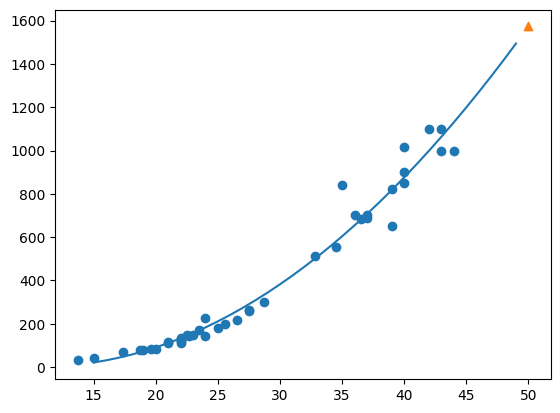

In [47]:
point = np.arange(15, 50)
plt.scatter(X_train, y_train)
plt.plot(point, 1.014*point**2 - 21.558*point + 116.040)
plt.scatter(50, 1573, marker='^')
plt.show